In [ ]:
## 첫번째 코드블록
import torch
print('pytorch version: {}'.format(torch.__version__))

pytorch version: 1.9.0+cu111


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image ,ImageSequence
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
#import check_util.checker as checker
%matplotlib inline

print('pytorch version: {}'.format(torch.__version__))
print('GPU 사용 가능 여부: {}'.format(torch.cuda.is_available()))
device = "cuda" if torch.cuda.is_available() else "cpu" # GPU 사용 가능 여부에 따라 device 정보 저장


pytorch version: 1.9.0+cu111
GPU 사용 가능 여부: True


In [ ]:
data_dir = './data'  # 압축 해제된 데이터셋의 디렉토리 경로

In [ ]:
batch_size = 30
num_epochs = 10
learning_rate = 0.0001

In [ ]:
def pil_loader(path):
    with Image.open(path) as img:
        frames = []
        for frame in ImageSequence.Iterator(img):
            frames.append(frame.convert('RGB'))
        return frames

In [ ]:
class SkeletonDataset(Dataset):
    def __init__(self, data_dir, mode, transform=None):
        self.all_data = sorted(glob.glob(os.path.join(data_dir, mode, '*','*')))
        self.transform = transform
        self.mode = mode

    def __getitem__(self, index):
        data_path = self.all_data[index]
        gif = pil_loader(data_path)


        frames = []
#         frame_count=0
#         for frame in gif:
#             frame_count += 1

#         print("{} : The number of frames in the image is {}".format(data_path,frame_count))


        for frame in (gif):

            frames.append(np.array(self.transform(frame)))

        # Stack the frames to create a 4D array
        img = np.stack(frames, axis=0)
        img = np.stack(img, axis=0)


       # Normalize to the [0, 1] range
        img = torch.FloatTensor(img)

        # Step 2: Get the label for the image
        basename = os.path.basename(data_path)

        if basename.startswith("animation.0."):
            label = 0 #"서있기"
        elif basename.startswith("animation.1."):
            label = 1 # "걷기"
        elif basename.startswith("animation.2."):
            label = 2   #"구부리기"
        elif basename.startswith("animation.3."):
            label = 3 #"비틀기"
        elif basename.startswith("animation.4."):
            label = 4#"넘기"
        elif basename.startswith("animation.5."):
            label = 5 #"물건꺼내기"
        elif basename.startswith("animation.6."):
            label = 6 #"밀고당기기"
        elif basename.startswith("animation.7."):
            label = 7 #"달리기"
        elif basename.startswith("animation.8."):
             label =8 #"제자리점프"
        elif basename.startswith("animation.9."):
            label = 9 #"발차기"
        elif basename.startswith("animation.10."):
            label = 10# "기어다니기"
        elif basename.startswith("animation.11."):
            label = 11# "엎드려있기"
        elif basename.startswith("animation.12."):
             label = 12 #"앉기"






        return img.reshape(3,30,60,60), label

    def __len__(self):
        return len(self.all_data)

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
data_transforms = {
    'train': transforms.Compose([transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])



    ]),
    'val': transforms.Compose([

        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

train_data = SkeletonDataset(data_dir='/home/mhealth02/바탕화면/workspace/split_0', mode='train', transform=data_transforms['train'])
val_data = SkeletonDataset(data_dir='/home/mhealth02/바탕화면/workspace/split_0', mode='val', transform=data_transforms['val'])
test_data = SkeletonDataset(data_dir='/home/mhealth02/바탕화면/workspace/split_0', mode='test', transform=data_transforms['val'])

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=True)

In [ ]:
for i, (batch_data, batch_labels) in enumerate(train_loader):
    print(f'Batch {i+1} data shape: {batch_data.shape}')


Batch 1 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 2 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 3 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 4 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 5 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 6 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 7 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 8 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 9 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 10 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 11 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 12 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 13 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 14 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 15 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 16 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 17 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 18 data shape: torch.Size([30, 3, 30, 60, 60])
Batch 19 data shape: torch.Size([30, 3, 30, 60, 60])
Ba

RuntimeError: shape '[3, 30, 60, 60]' is invalid for input of size 313200

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # self.conv 구현
        self.conv = nn.Sequential(
            ## 코드 시작 ##
            torch.nn.Conv3d(3, 32, kernel_size=3),    # conv_1 해당하는 층
            torch.nn.BatchNorm3d(32),    # batch_norm_1 해당하는 층
            torch.nn.ReLU(),    # ReLU_1 해당하는 층
            torch.nn.MaxPool3d(2),    # maxpool_1 해당하는 층

            torch.nn.Conv3d(32, 64, kernel_size=3),    # conv_1 해당하는 층
            torch.nn.BatchNorm3d(64),    # batch_norm_1 해당하는 층
            torch.nn.ReLU(),    # ReLU_1 해당하는 층
            torch.nn.MaxPool3d(2),

            torch.nn.Conv3d(64, 128, kernel_size=3),    # conv_1 해당하는 층
            torch.nn.BatchNorm3d(128),    # batch_norm_1 해당하는 층
            torch.nn.ReLU(),    # ReLU_1 해당하는 층
            torch.nn.MaxPool3d(2),

            torch.nn.Conv3d(128, 128, kernel_size=3),    # conv_1 해당하는 층
            torch.nn.BatchNorm3d(128),    # batch_norm_1 해당하는 층
            torch.nn.ReLU(),    # ReLU_1 해당하는 층
            torch.nn.MaxPool3d(2)
            ## 코드 종료 ##
        )

        # self.fc 구현
        ## 코드 시작 ##
        self.fc1 = nn.Linear(4608,512)
        self.fc2 = nn.Linear(512,12)
        ## 코드 종료 ##

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
import torch
import torch.nn as nn
import torchvision.models.resnet as resnet

class Conv3DResNet(resnet.ResNet):
    def __init__(self, block, layers, num_classes):
        super().__init__(block, layers, num_classes)

        self.conv1 = nn.Conv3d(3, 64, kernel_size=(7, 7, 7), stride=(2, 2, 2), padding=(3, 3, 3), bias=False)
        self.bn1 = nn.BatchNorm3d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool3d(kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))

        self.conv2 = nn.Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        self.bn2 = nn.BatchNorm3d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=(0, 0, 0))

        self.conv3 = nn.Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        self.bn3 = nn.BatchNorm3d(256)
        self.relu3 = nn.ReLU(inplace=True)
        self.maxpool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=(0, 0, 0))

        self.fc1 = nn.Linear(25088 , 512)

        self.fc2 = nn.Linear(512, num_classes)
        # Implement the rest of the layers as needed

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)

        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))

        x = self.fc2(x)

        return x

In [ ]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv3d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm3d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv3d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm3d(out_channels)
        self.downsample = None

        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm3d(out_channels),
            )

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

class ResNet3D(nn.Module):
    def __init__(self, block, layers, num_classes=2):
        super(ResNet3D, self).__init__()
        self.in_channels = 1

        self.conv1 = nn.Conv3d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm3d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))

        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [ ]:
import torch
import torch.nn as nn

class C3D(nn.Module):
    def __init__(self, num_classes=12):
        super(C3D, self).__init__()

        # Define the network layers
        self.conv1 = nn.Conv3d(3, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv2 = nn.Conv3d(64, 128, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv3a = nn.Conv3d(128, 256, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv3b = nn.Conv3d(256, 256, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv4a = nn.Conv3d(256, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv4b = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool4 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.conv5a = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.conv5b = nn.Conv3d(512, 512, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool5 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        self.fc6 = nn.Linear(8192, 4096)
        self.fc7 = nn.Linear(4096, 4096)
        self.fc8 = nn.Linear(4096, num_classes)

    def forward(self, x):
        # Pass the input through the network
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = self.conv3a(x)
        x = nn.functional.relu(x)
        x = self.conv3b(x)
        x = nn.functional.relu(x)
        x = self.pool3(x)
        x = self.conv4a(x)
        x = nn.functional.relu(x)
        x = self.conv4b(x)
        x = nn.functional.relu(x)
        x = self.pool4(x)
        x = self.conv5a(x)
        x = nn.functional.relu(x)
        x = self.conv5b(x)
        x = nn.functional.relu(x)
        x = self.pool5(x)

        x=self.fc6(x)
        x=self.fc7(x)
        x=self.fc8(x)



        return x

In [ ]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv3d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm3d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv3d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm3d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv3d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm3d(self.expansion*planes)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet18(nn.Module):
    def __init__(self, num_classes=5):
        super(ResNet18, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv3d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm3d(64)
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self._make_layer(64, 2, stride=1)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)

        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, planes, blocks, stride):
        strides = [stride] + [1]*(blocks-1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes * BasicBlock.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

## 6. train, validation, test 함수 정의


In [ ]:
def train(num_epochs, model, data_loader, criterion, optimizer, saved_dir, val_every, device):
    print('Start training..')
    best_loss = 9999999



    # define the loss function
    criterion = nn.CrossEntropyLoss()

    # train the model
    for epoch in range(num_epochs):
        for i, (imgs, labels) in enumerate(data_loader):
            imgs, labels = imgs.to(device), labels.to(device)

            # forward pass
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            # calculate L2 regularization loss


            # backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # calculate accuracy
            _, argmax = torch.max(outputs, 1)
            accuracy = (labels == argmax).float().mean()

            if (i+1) % 3 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                    epoch+1, num_epochs, i+1, len(data_loader), loss.item(), accuracy.item() * 100))

        if (epoch + 1) % val_every == 0:
            avrg_loss = validation(epoch + 1, model, val_loader, criterion, device)
            if avrg_loss < best_loss:
                print('Best performance at epoch: {}'.format(epoch + 1))
                print('Save model in', saved_dir)
                best_loss = avrg_loss
                save_model(model, saved_dir)


In [ ]:
def validation(epoch, model, data_loader, criterion, device):
    print('Start validation #{}'.format(epoch) )
    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        total_loss = 0
        cnt = 0
        for i, (imgs, labels) in enumerate(data_loader):
            imgs, labels = imgs.to(device), labels.to(device)
            ## b코드 시작 ##
            outputs = model(imgs)
            loss = criterion(outputs,labels)
            ## 코드 종료 ##
            total += imgs.size(0)
            _, argmax = torch.max(outputs, 1)
            correct += (labels == argmax).sum().item()
            total_loss += loss
            cnt += 1
        avrg_loss = total_loss / cnt
        print('Validation #{}  Accuracy: {:.2f}%  Average Loss: {:.4f}'.format(epoch, correct / total * 100, avrg_loss))
    model.train()
    return avrg_loss

## Heatmap 생성

In [ ]:
# nb_classes = 9
# confusion_matrix = np.zeros((nb_classes, nb_classes))
# with torch.no_grad():
#     for i, (inputs, classes) in enumerate(test_loader):
#         inputs = inputs.to(DEVICE)
#         classes = classes.to(DEVICE)
#         outputs = model(inputs)
#         _, preds = torch.max(outputs, 1)
#         for t, p in zip(classes.view(-1), preds.view(-1)):
#                 confusion_matrix[t.long(), p.long()] += 1

# plt.figure(figsize=(15,10))

# class_names = list(label2class.values())
# df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
# heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
# plt.ylabel('True label')
# plt.xlabel('Predicted label')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import math
def plot_confusion_matrix(cm, labels, title='Confusion Matrix', cmap='Blues'):
    # Normalize the confusion matrix to show row-wise averages
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8,6))
    sns.heatmap(cm*100, annot=True, cmap=cmap, fmt='.2f')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.show()

def test(model, data_loader, device, num_classes):
    print('Start test..')
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        true_labels = []
        predicted_labels = []
        for i, (imgs, labels) in enumerate(data_loader):
            imgs, labels = imgs.to(device), labels.to(device)
            ## 코드 시작 ##
            outputs = model(imgs)
            ## 코드 종료 ##
            _, argmax = torch.max(outputs, 1)    # max()를 통해 최종 출력이 가장 높은 class 선택
            total += imgs.size(0)
            correct += (labels == argmax).sum().item()
            true_labels.extend(labels.cpu().numpy().tolist())
            predicted_labels.extend(argmax.cpu().numpy().tolist())

        print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))
         # 해당 데이터셋에서 사용된 클래스의 개수
        print(np.unique(true_labels))
        cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
        print(cm)

        print('Confusion Matrix:')

        plot_confusion_matrix(cm, labels=np.arange(8),title='Confusion Matrix Heatmap',cmap='Blues')

    model.train()

/home/mhealth02/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 7. 모델 저장 함수 정의


In [ ]:
def save_model(model, saved_dir, file_name='best_model.pt'):
    os.makedirs(saved_dir, exist_ok=True)
    check_point = {
        'net': model.state_dict()
    }
    output_path = os.path.join(saved_dir, file_name)
    ## 코드 시작 ##
    torch.save(check_point,output_path)
    ## 코드 종료 ##

## 8. 모델 생성 및 Loss function, Optimizer 정의

생성한 모델을 학습 시키기 위해서 손실함수를 정의해야 합니다. 뉴럴네트워크는 경사하강(gradient descent)방법을 이용하여 손실함수의 값을 줄이는 방향으로 파라미터를 갱신(update) 하게 됩니다. 또한 효과적인 경사하강 방법을 적용하기 위해 옵티마이져를 함께 사용할 겁니다.

### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요.
1. **<5. 네트워크 설계>** 에서 정의한 SimpleCNN class를 통해 모델을 생성하고 이를 **model** 변수에 저장합니다.
2. 분류 문제에서는 손실함수로 Cross Entropy Loss를 사용합니다. Cross Entropy Loss Function([`nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/nn.html?highlight=crossentropy#torch.nn.CrossEntropyLoss))을 만들고 `criterion` 변수에 저장합니다.
3. 이번 실습에서는 Adam 옵티마이저를 통해 파라미터를 업데이트 하겠습니다. Adam optimizer([`torch.optim.Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam))를 `optimizer` 변수에 저장합니다. **<3. 하이퍼파라미터 세팅>** 에서 정의한 `learning_rate` 를 사용하세요.

`val_every`는 검증을 몇 에폭마다 진행할지 정하는 변수입니다. `saved_dir`은 모델이 저장될 디렉토리의 경로입니다.

**모델을 생성하고 손실함수 및 옵티마이저를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [ ]:


# define the L2 regularization strength

# create the optimizer and add L2 regularization to it

# import torchvision.models.video as models
import torchvision.models.video as models
# # Load the pre-trained model
# model = models.r3d_18(pretrained=True)  # 위의 설명 1. 을 참고하여 None을 채우세요.
# model = model.to(device)
import torch
import torchvision

# Load the pretrained SlowOnly model


# Print the model architecture

model = models.mc3_18(pretrained=True)  # 위의 설명 1. 을 참고하여 None을 채우세요.
model = model.to(device)

num_ftrs = model.fc.in_features
## 코드 시작 ##
model.fc = nn.Linear(num_ftrs,13)

model = model.to(device)
# # Load the pre-trained model
# model = ResNet18()
#  # 위의 설명 1. 을 참고하여 None을 채우세요.
# model = model.to(device)

criterion = nn.CrossEntropyLoss()      # 위의 설명 2. 를 참고하여 None을 채우세요.
optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)    # 위의 설명 3. 을 참고하여 None을 채우세요.
## 코드 종료 ##
CUDA_LAUNCH_BLOCKING=1.

val_every = 1
saved_dir = './saved/SimpleCNN'

In [ ]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
from torchsummary import summary
summary(model,input_size=(3,30,60,60))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 64, 30, 30, 30]          28,224
       BatchNorm3d-2       [-1, 64, 30, 30, 30]             128
              ReLU-3       [-1, 64, 30, 30, 30]               0
      Conv3DSimple-4       [-1, 64, 30, 30, 30]         110,592
       BatchNorm3d-5       [-1, 64, 30, 30, 30]             128
              ReLU-6       [-1, 64, 30, 30, 30]               0
      Conv3DSimple-7       [-1, 64, 30, 30, 30]         110,592
       BatchNorm3d-8       [-1, 64, 30, 30, 30]             128
              ReLU-9       [-1, 64, 30, 30, 30]               0
       BasicBlock-10       [-1, 64, 30, 30, 30]               0
     Conv3DSimple-11       [-1, 64, 30, 30, 30]         110,592
      BatchNorm3d-12       [-1, 64, 30, 30, 30]             128
             ReLU-13       [-1, 64, 30, 30, 30]               0
     Conv3DSimple-14       [-1, 64, 30,

아래의 코드를 실행해 코드를 성공적으로 완성했는지 확인해보세요.

별다른 문제가 없다면 이어서 진행하면 됩니다.


## 9. Training

**<6. train, validation, test 함수 정의>** 에서 작성한 `train` 함수를 통해 학습을 진행합니다. 네트워크의 규모가 큰 편이 아니지만, CPU를 통해 학습되기 때문에 시간이 조금 필요합니다. 컴퓨터 성능에 따라 20~30분의 시간이 소요될 수 있습니다. 시간 여유가 없는 분들은 모델 학습이 적당히 진행된다는 정도만 확인하고 다음 단계로 넘어가셔도 됩니다.

만약 어느정도 기다렸음에도 학습 accuracy가 50%를 넘는 양상을 보이지 않는다면 구현한 코드에 문제가 있을 수 있습니다. 이러한 경우에는 구현한 train 함수를 다시 한 번 확인하시기 바랍니다.

또한, 모델 저장 코드를 제대로 구현했다면 첫 에폭 학습후에 ./saved/SimpleCNN 경로에 best_model.pt 파일이 저장되어 있어야 합니다. 만약에 파일이 존재하지 않는다면 모델 저장 코드를 다시 확인하시기 바랍니다.

In [ ]:
train(3, model, train_loader, criterion, optimizer, saved_dir, val_every, device)

Start training..
Epoch [1/3], Step [3/200], Loss: 0.3600, Accuracy: 93.33%
Epoch [1/3], Step [6/200], Loss: 0.4545, Accuracy: 83.33%
Epoch [1/3], Step [9/200], Loss: 0.5174, Accuracy: 93.33%
Epoch [1/3], Step [12/200], Loss: 0.3099, Accuracy: 96.67%
Epoch [1/3], Step [15/200], Loss: 0.4226, Accuracy: 90.00%
Epoch [1/3], Step [18/200], Loss: 0.3446, Accuracy: 93.33%
Epoch [1/3], Step [21/200], Loss: 0.4034, Accuracy: 86.67%
Epoch [1/3], Step [24/200], Loss: 0.4567, Accuracy: 83.33%
Epoch [1/3], Step [27/200], Loss: 0.4092, Accuracy: 86.67%
Epoch [1/3], Step [30/200], Loss: 0.4072, Accuracy: 93.33%
Epoch [1/3], Step [33/200], Loss: 0.3833, Accuracy: 83.33%
Epoch [1/3], Step [36/200], Loss: 0.3122, Accuracy: 90.00%
Epoch [1/3], Step [39/200], Loss: 0.5022, Accuracy: 86.67%
Epoch [1/3], Step [42/200], Loss: 0.2662, Accuracy: 90.00%
Epoch [1/3], Step [45/200], Loss: 0.4330, Accuracy: 83.33%
Epoch [1/3], Step [48/200], Loss: 0.5562, Accuracy: 86.67%
Epoch [1/3], Step [51/200], Loss: 0.4875, 

Epoch [3/3], Step [9/200], Loss: 0.2219, Accuracy: 93.33%
Epoch [3/3], Step [12/200], Loss: 0.1954, Accuracy: 96.67%
Epoch [3/3], Step [15/200], Loss: 0.1430, Accuracy: 93.33%
Epoch [3/3], Step [18/200], Loss: 0.1375, Accuracy: 96.67%
Epoch [3/3], Step [21/200], Loss: 0.1047, Accuracy: 100.00%
Epoch [3/3], Step [24/200], Loss: 0.0771, Accuracy: 100.00%
Epoch [3/3], Step [27/200], Loss: 0.1412, Accuracy: 96.67%
Epoch [3/3], Step [30/200], Loss: 0.0965, Accuracy: 96.67%
Epoch [3/3], Step [33/200], Loss: 0.1464, Accuracy: 93.33%
Epoch [3/3], Step [36/200], Loss: 0.0463, Accuracy: 100.00%
Epoch [3/3], Step [39/200], Loss: 0.2430, Accuracy: 90.00%
Epoch [3/3], Step [42/200], Loss: 0.0460, Accuracy: 100.00%
Epoch [3/3], Step [45/200], Loss: 0.1200, Accuracy: 96.67%
Epoch [3/3], Step [48/200], Loss: 0.1437, Accuracy: 96.67%
Epoch [3/3], Step [51/200], Loss: 0.0423, Accuracy: 100.00%
Epoch [3/3], Step [54/200], Loss: 0.0499, Accuracy: 100.00%
Epoch [3/3], Step [57/200], Loss: 0.2424, Accuracy:

## 10. 저장된 모델 불러오기 및 test


In [ ]:
model_path = './saved/SimpleCNN/best_model.pt'
#model_path = './saved/pretrained/SimpleCNN/best_model.pt' # 모델 학습을 끝까지 진행하지 않은 경우에 사용
 # 아래의 모델 불러오기를 정확히 구현했는지 확인하기 위해 새로 모델을 선언하여 학습 이전 상태로 초기화

## 코드 시작 ##
checkpoint = torch.load(model_path,map_location=device)
state_dict    = checkpoint['net']
model.load_state_dict(state_dict)
## 코드 종료 ##

<All keys matched successfully>

마지막으로 모델의 성능을 테스트합니다. 75% 내외의 성능이 나온다면 학습 및 모델 불러오기가 성공적으로 진행된 것입니다.

Start test..
Test accuracy for 1950 images: 75.03%
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[[133   6   9   1   3   1   0   0   1   8   0   0   0]
 [ 18 133   3   3   3   4   0   1   5   0   0   0   0]
 [  7   4 115   6   5   5   1   0   4   0   0   0   0]
 [  4   1   4 125  10   4   1   5   6   5   0   0   0]
 [  5   5   2   3  99   3   3   6   4  15   2   0   0]
 [  6   2  14  16   6 117   2   3   8   6   8   0   1]
 [  0   0   3   5   3   2 173   4   2   4   1   0   0]
 [  3   4   2   7  12   2   3  87   4   6   4   0   0]
 [  5   9  13   6   7   3   1   3  88   1   1   0   0]
 [  7   6   2   7  28   3   1   9   3  63   0   0   1]
 [  1   0   0   0   3   2   0   3   0   2 106   1   2]
 [  0   0   0   0   0   2   0   2   0   0   9  77   1]
 [  0   0   0   0   0   3   0   3   0   0   6   2 147]]
Confusion Matrix:


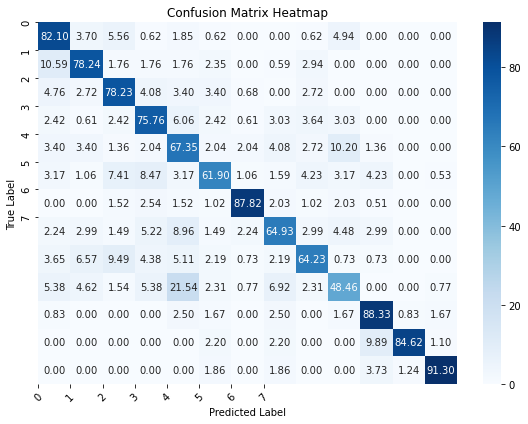

In [ ]:
test(model, test_loader, device,13)

---